In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

#suffix = 'BDT_v1_goodVtx_v10'
suffix = 'BDT_preselections'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

## Signal

In [5]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [6]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75']

In [7]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [8]:
table = eff_cutflow
table.columns = cutnames

In [9]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [10]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [11]:
table = cts_cutflow
table.columns = cutnames

In [12]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75"
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.0355,23.2497,23.2279,22.6382,22.6382,22.4671
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",653.3357,565.9179,565.5692,550.4106,550.4106,545.7087
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",809.7825,701.1258,700.5339,682.0879,682.0879,677.1237
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.1167,38.8657,38.8470,37.6491,37.6428,37.3623
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,075.5539",919.8550,919.1357,896.0713,896.0713,889.0417
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,439.8035","1,246.5330","1,246.2348","1,211.0406","1,211.0406","1,202.0942"
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,067.0622","9,652.4573","9,652.4573","9,369.6270","9,369.6270","9,298.7876"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,104.9556,89.1995,89.1995,86.8710,86.8710,86.6113
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",694.2471,599.8579,599.8579,580.8584,580.8584,575.7876
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,184.5614","1,886.2087","1,883.3543","1,834.8219","1,834.8219","1,822.9316"


In [13]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [14]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


In [61]:
cuts = utils.get_signal_list_of_cuts(sig_histo)

cuts[1] = 'n(good vertex) > 0 && 0 < N(Jets) < 3'
cuts[2] = 'b-jet veto loose WP'
cuts[3] = r"Leading jet $p_{T} > 80$ GeV"
cuts[4] = r"Leading jet $|\eta| < 2.4$"
cuts[5] = r"$|\Delta\phi(p_{T}^{miss},$leading jet)$| > 2.0$"
cuts[6] = r"min$|\Delta\phi(p_{T}^{miss},$all jets)$| < 0.75$"

print(cuts)


['Preselections', 'n(good vertex) > 0 && 0 < N(Jets) < 3', 'b-jet veto loose WP', 'Leading jet $p_{T} > 80$ GeV', 'Leading jet $|\\eta| < 2.4$', '$|\\Delta\\phi(p_{T}^{miss},$leading jet)$| > 2.0$', 'min$|\\Delta\\phi(p_{T}^{miss},$all jets)$| < 0.75$']


In [62]:
table = cts_cutflow
table.columns = cuts

In [75]:
sig_cdict = {
    '5': "#3f90da", 
    '10': "#ffa90e", 
    '20': "#bd1f01", 
    '30': "#94a4a2", 
    '40': "#832db6", 
    '50': "#a96b59", 
    '60': "#e76300", 
    '70': "#b9ac70", 
    '80': "#717581", 
    '90': "#92dadd",
    '100': "#2ca02c"

}

In [76]:
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (18,13)

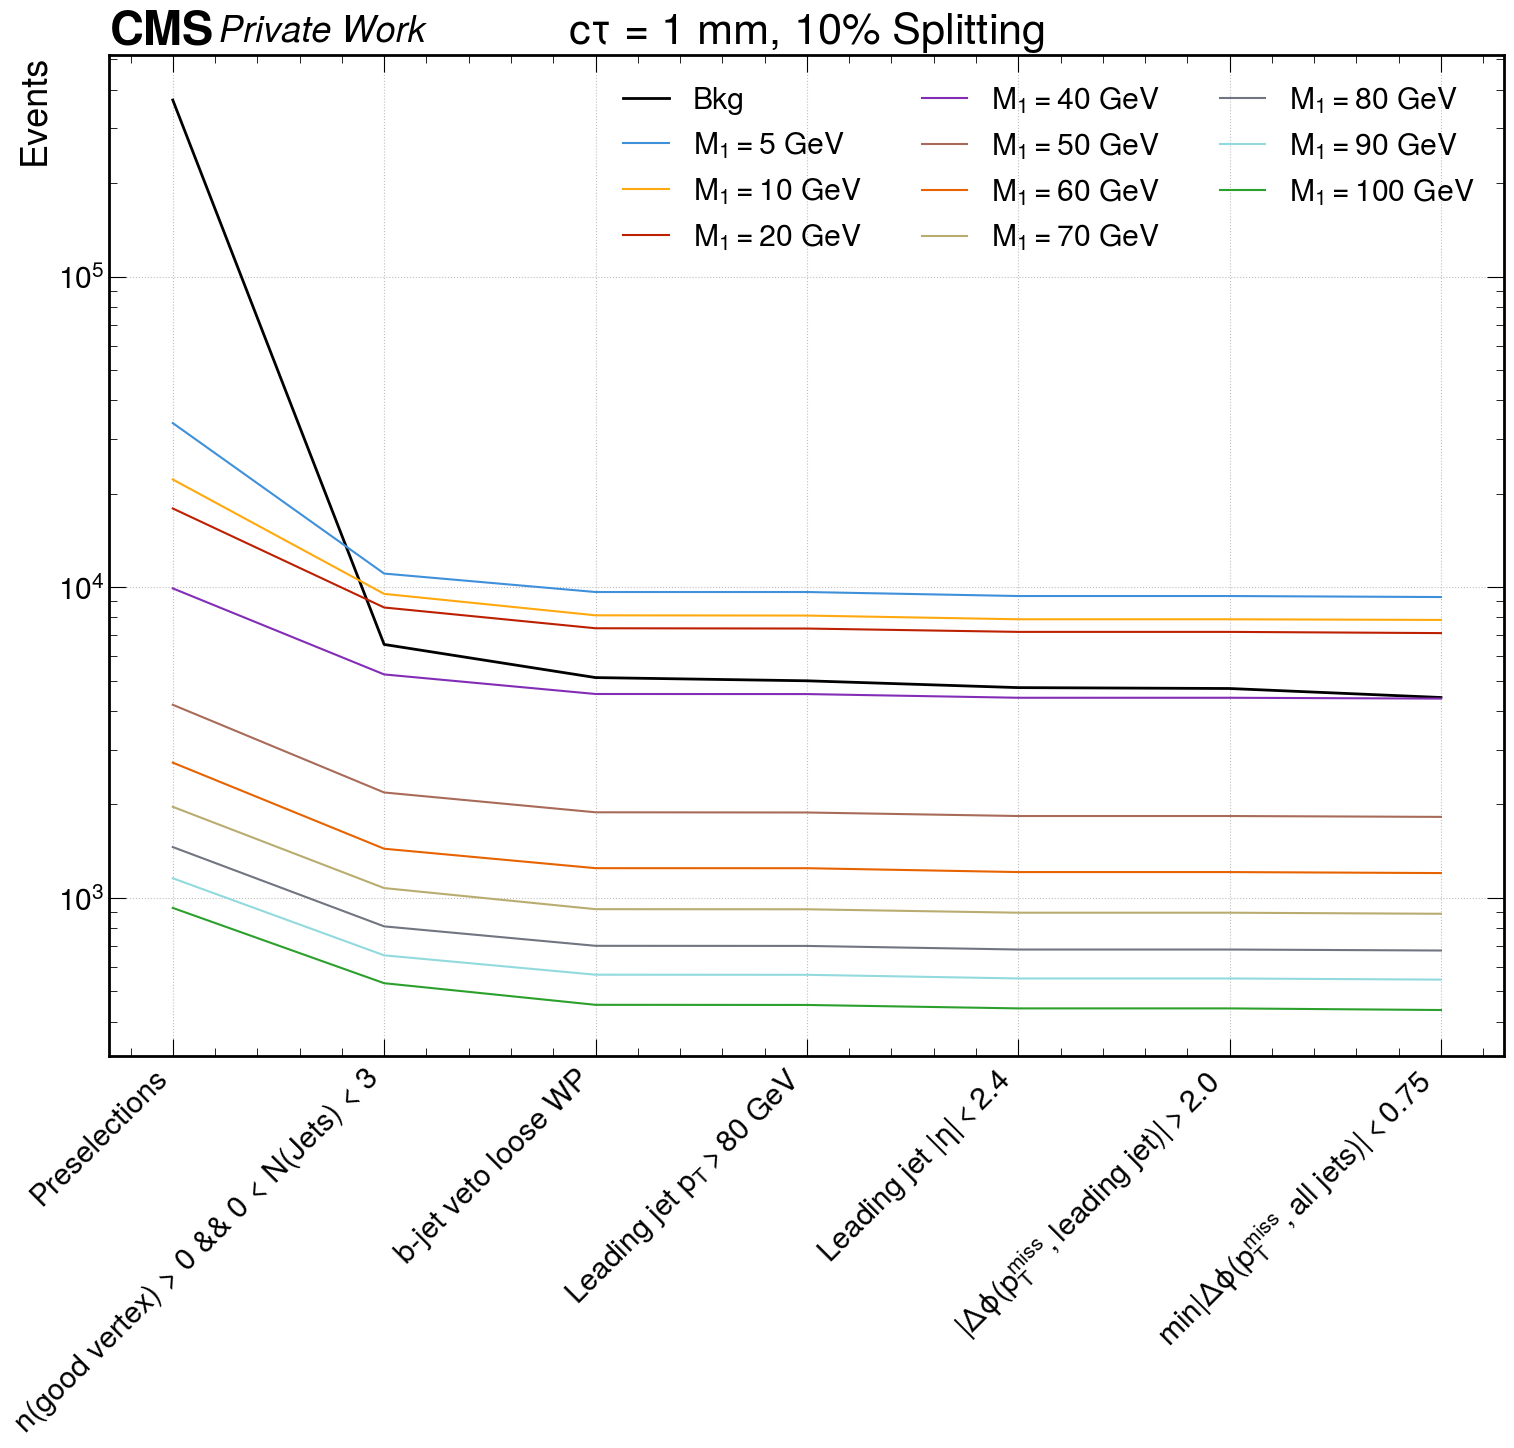

In [104]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 1
delt = 0.1

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

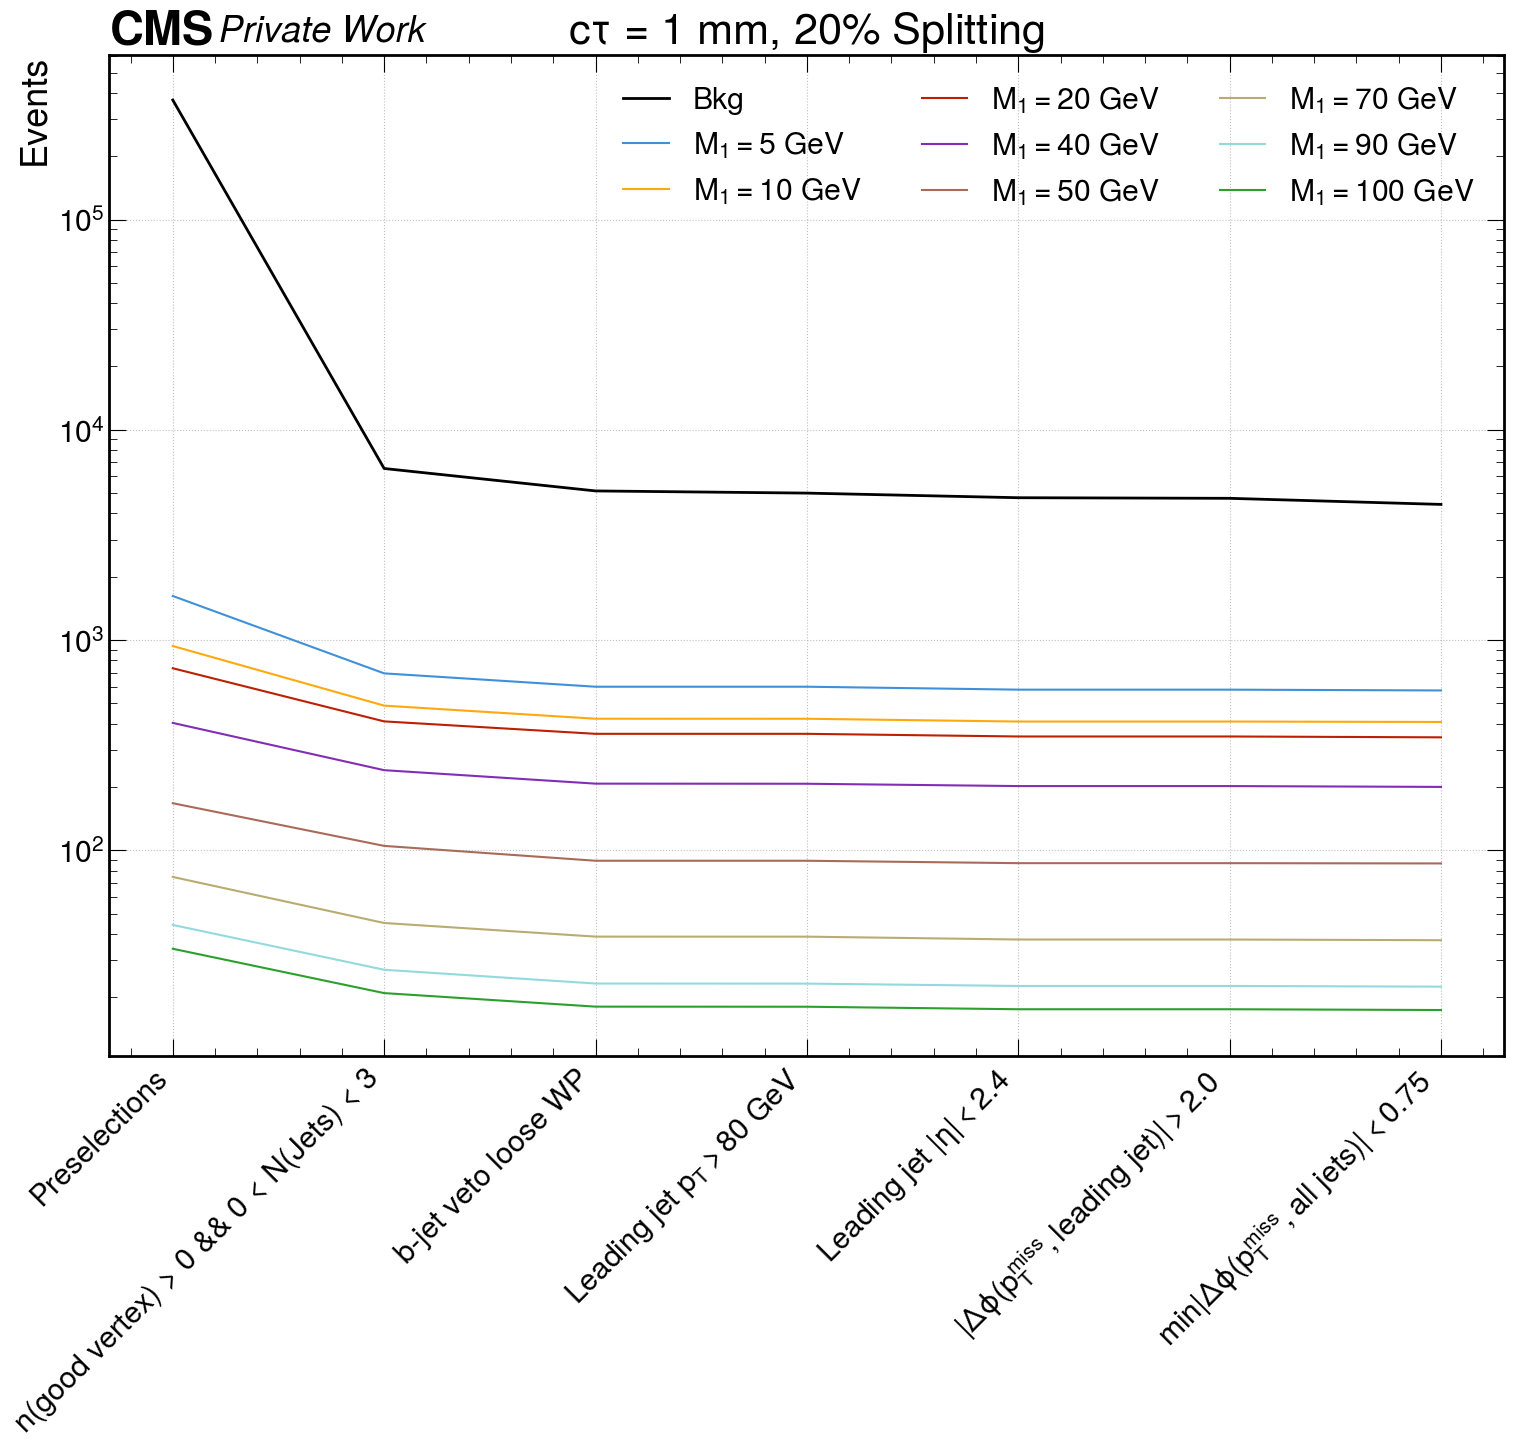

In [105]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 1
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

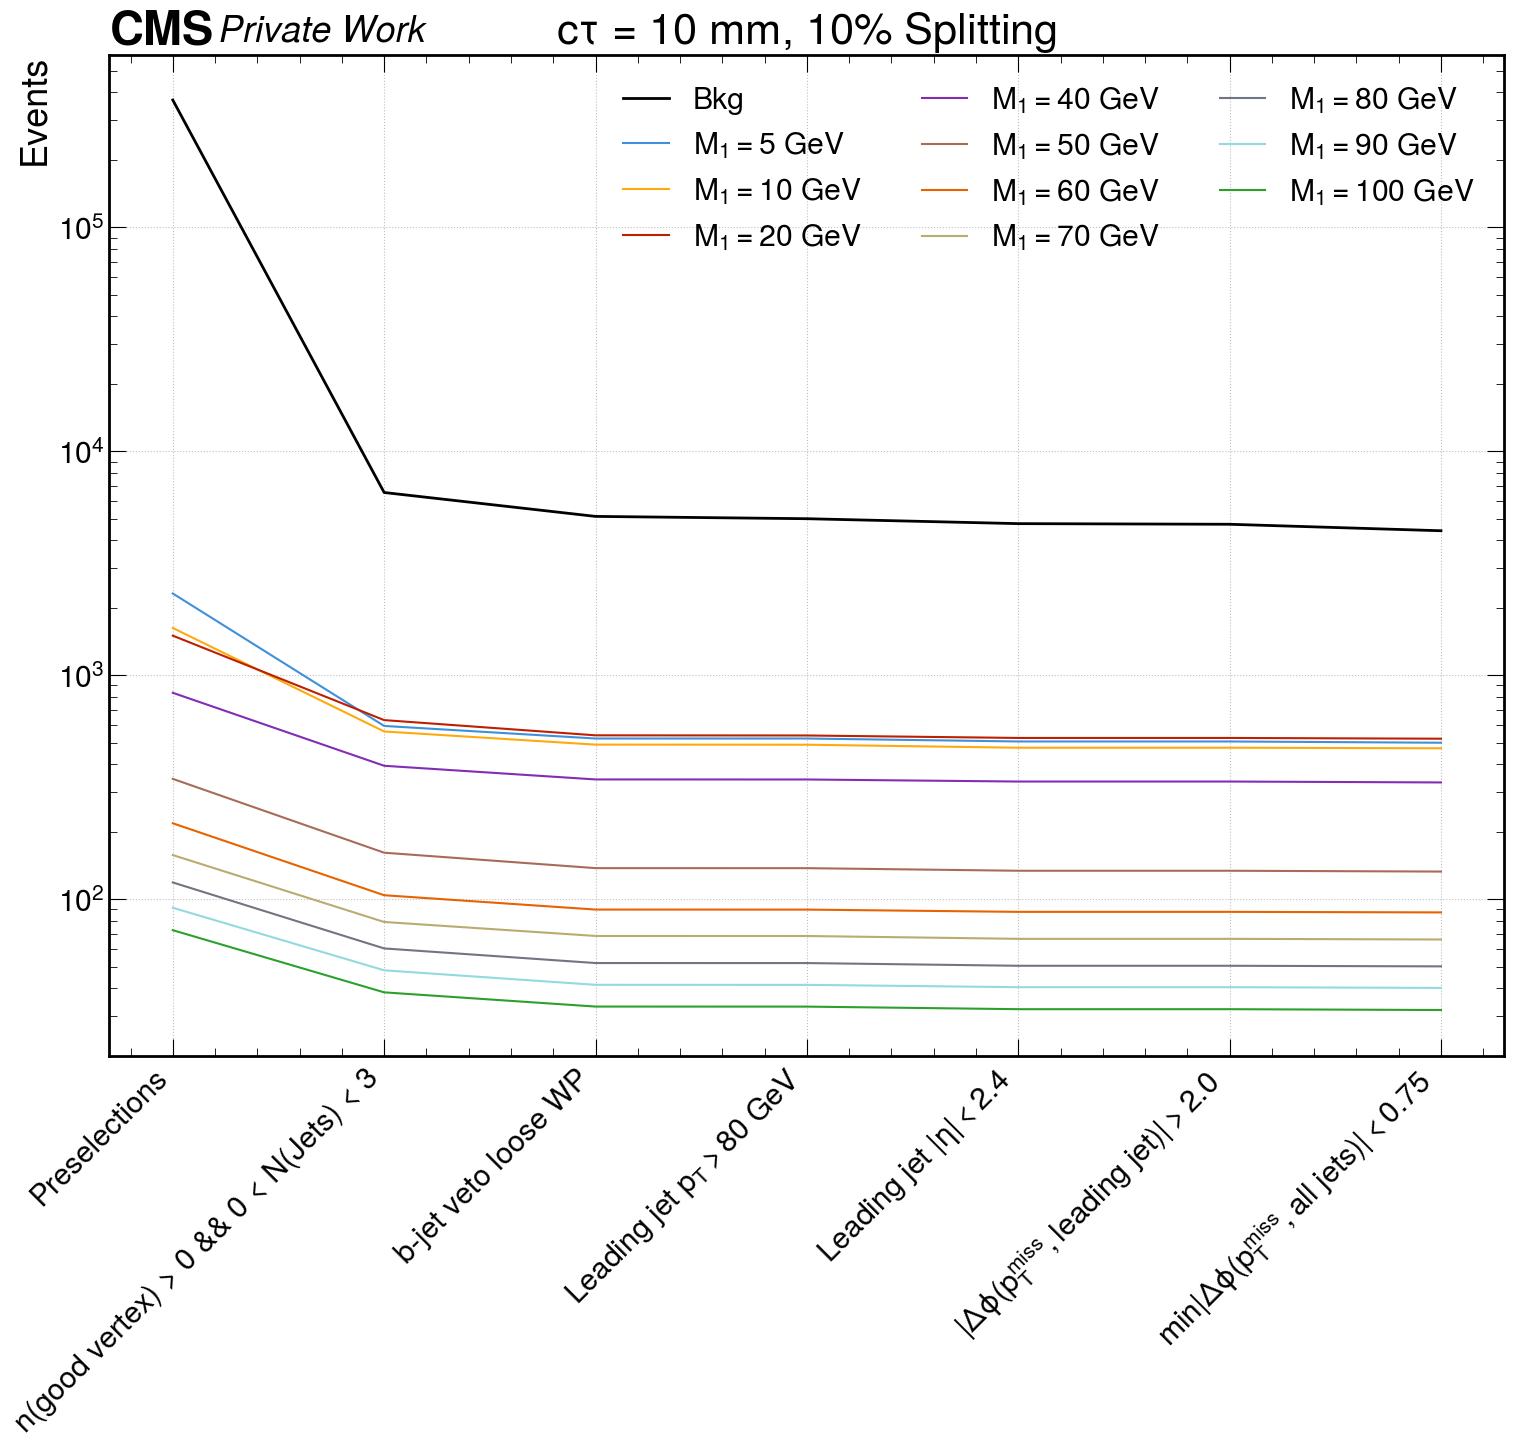

In [106]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 10
delt = 0.1

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

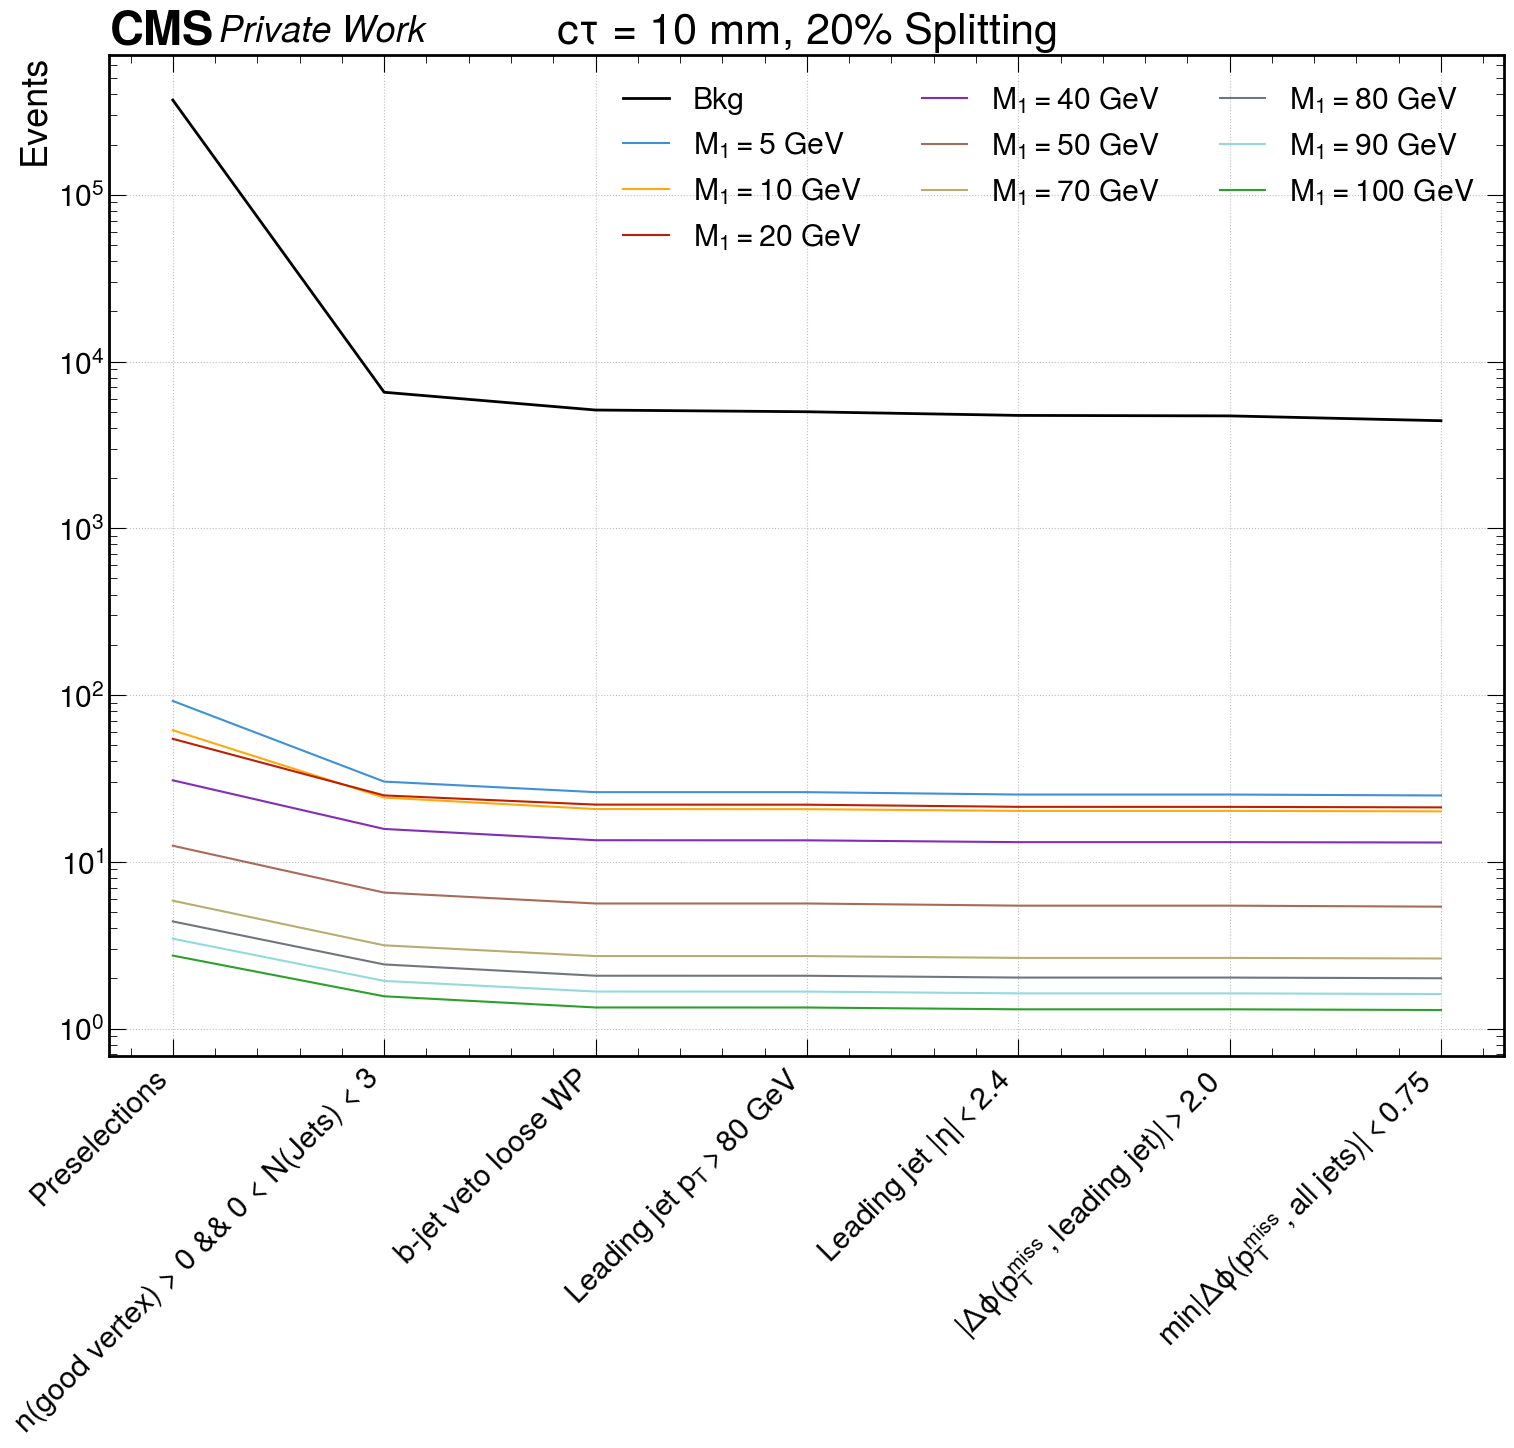

In [107]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 10
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

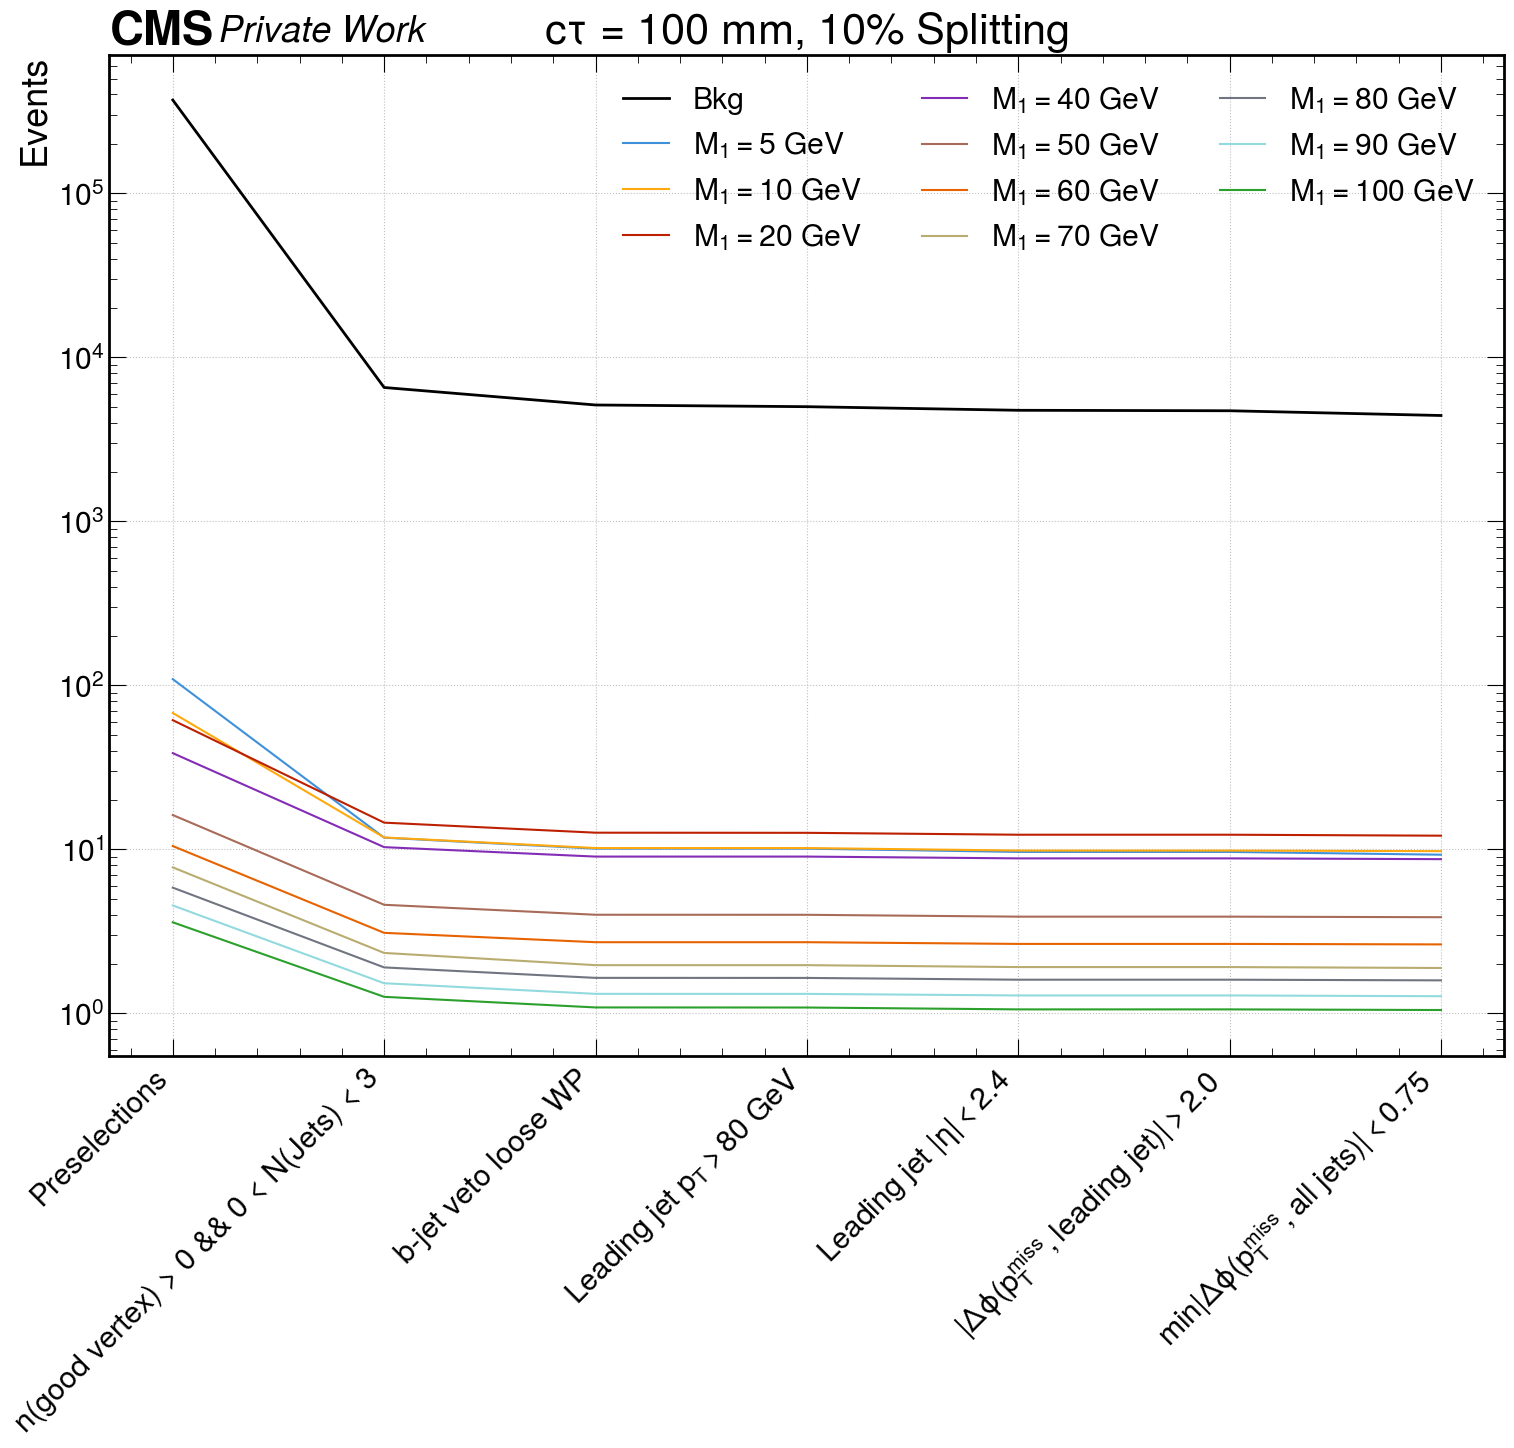

In [108]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 100
delt = 0.1

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

In [ ]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 100
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


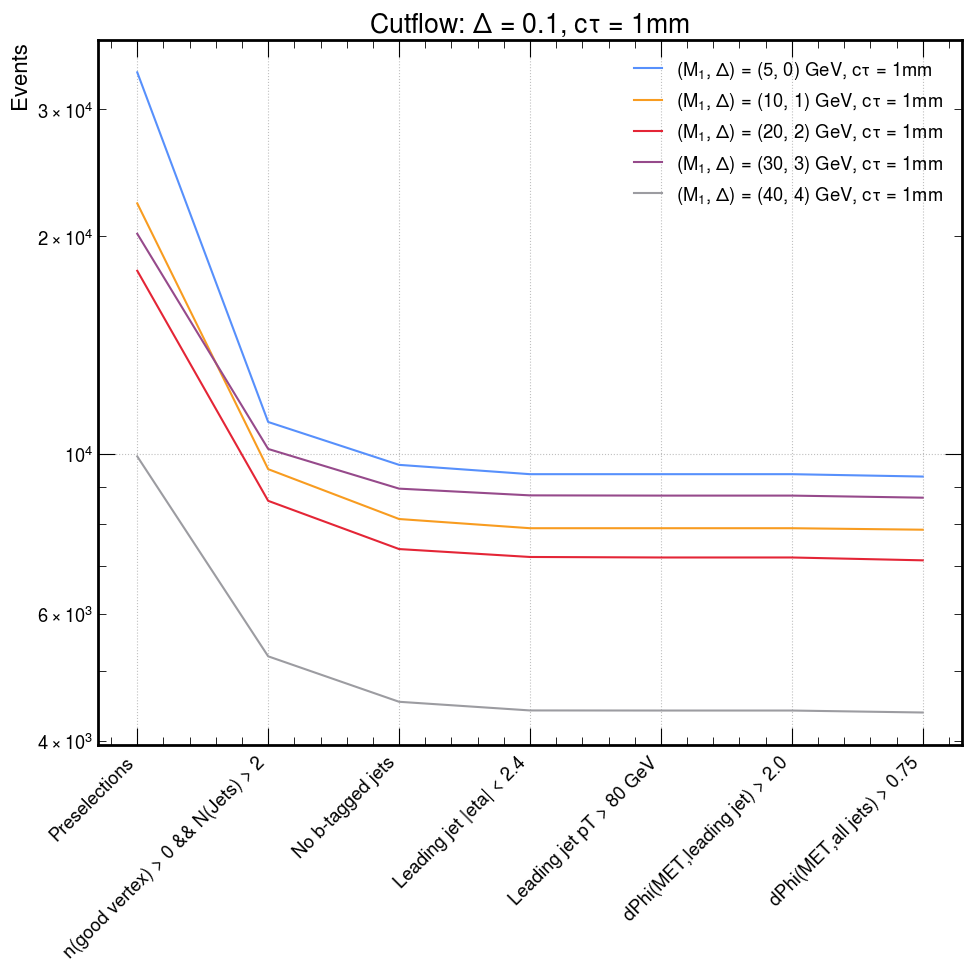

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


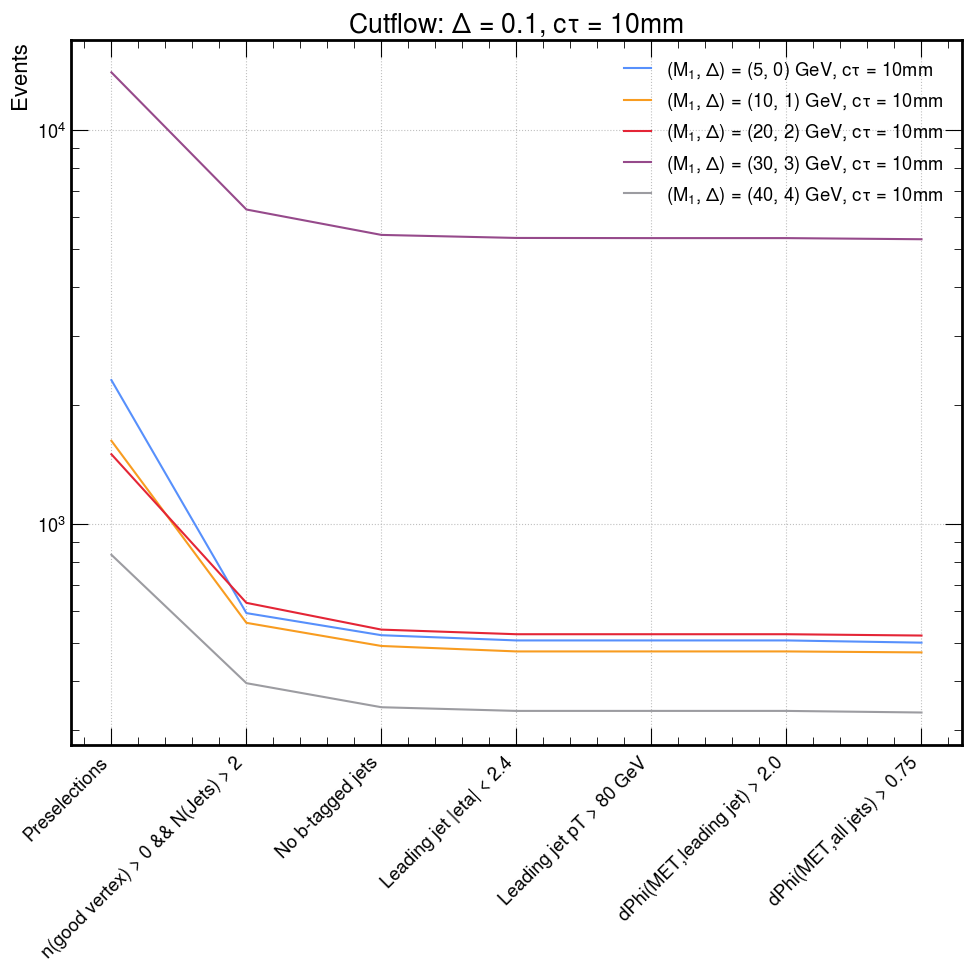

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


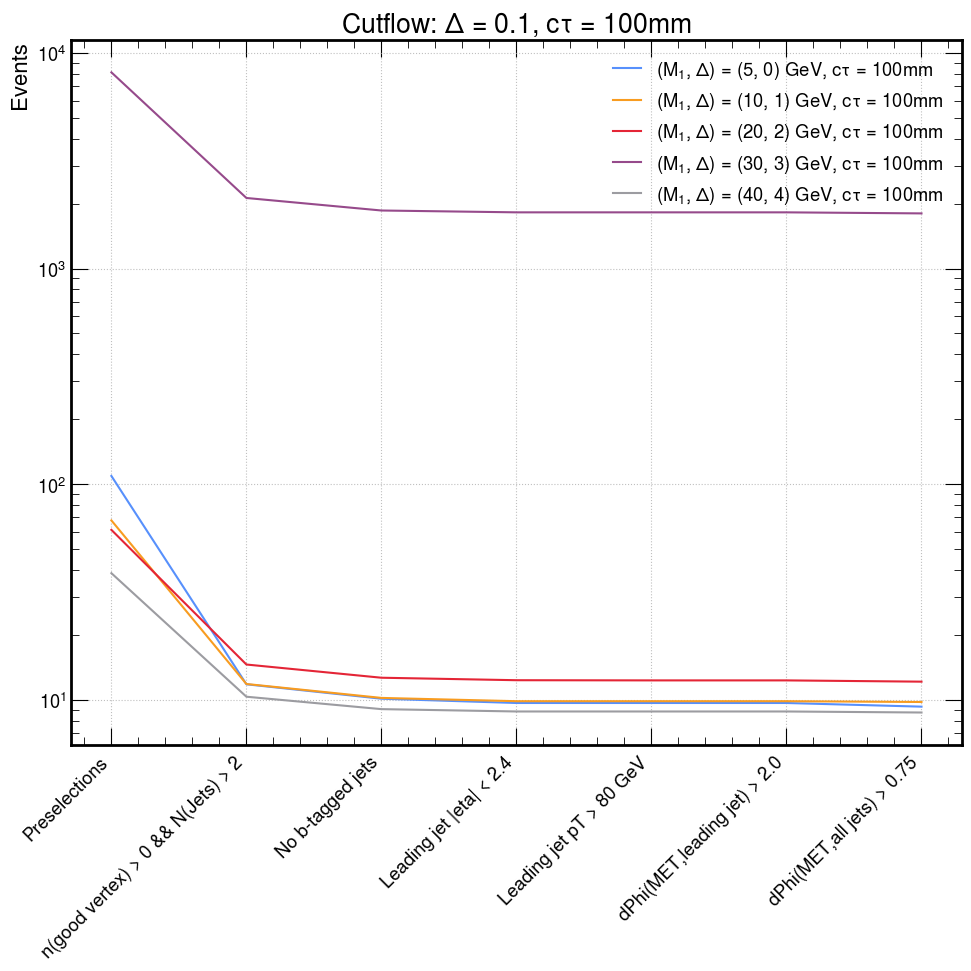

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


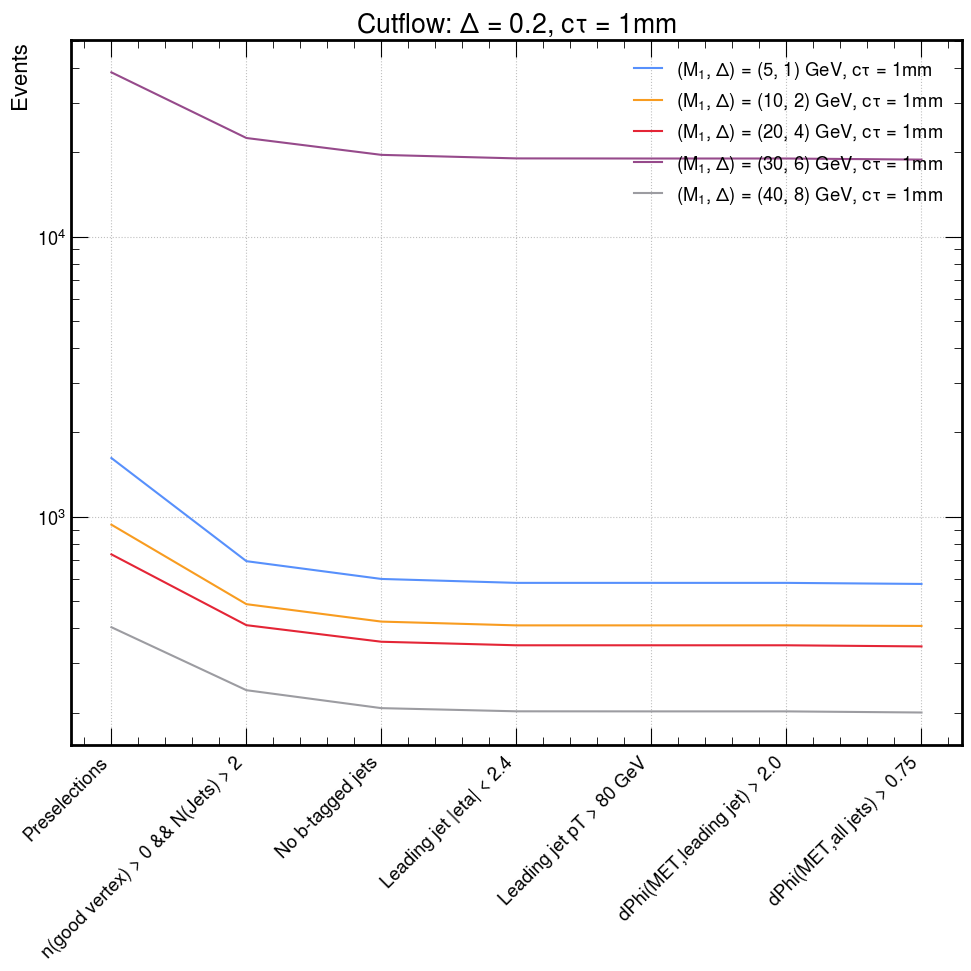

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


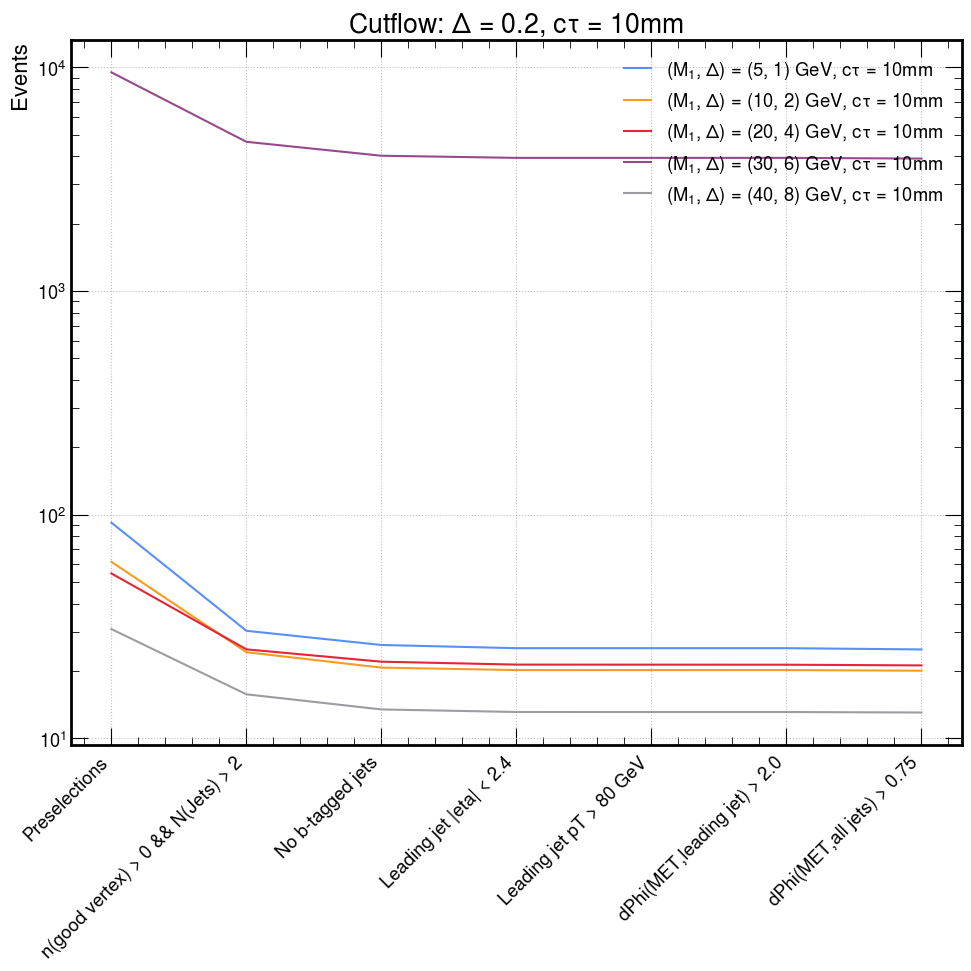

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


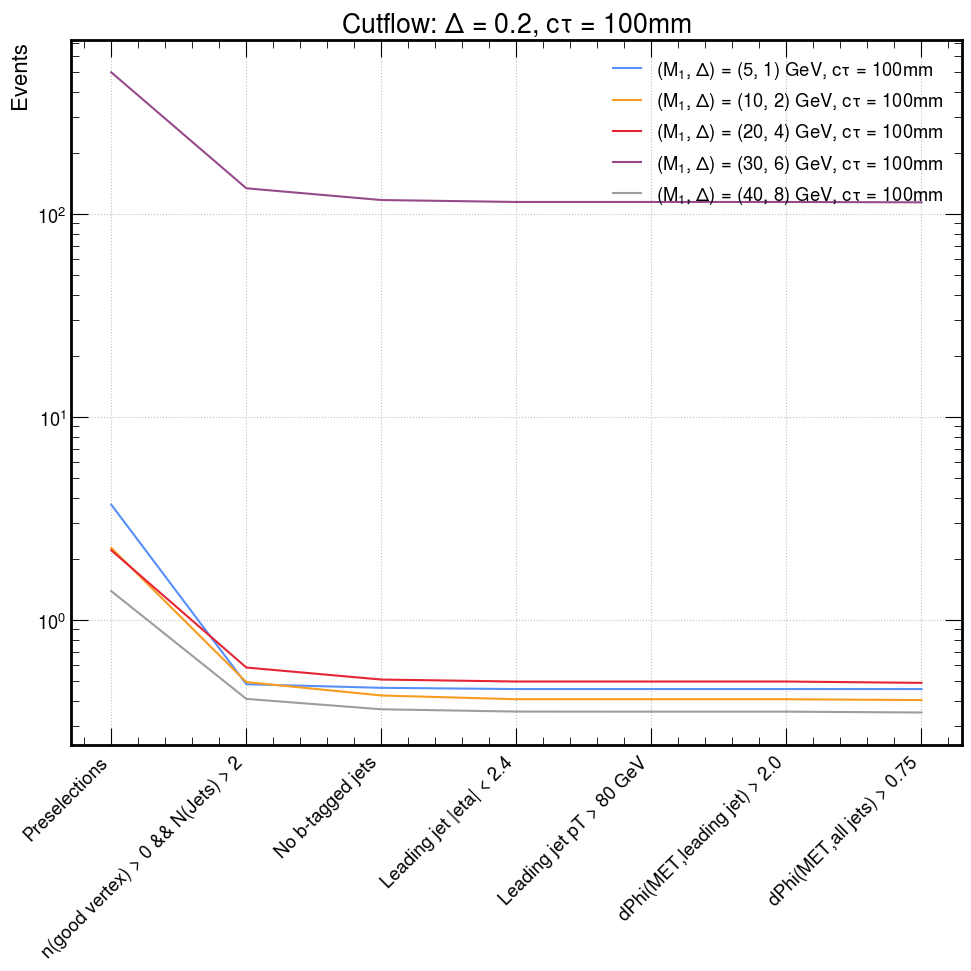

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


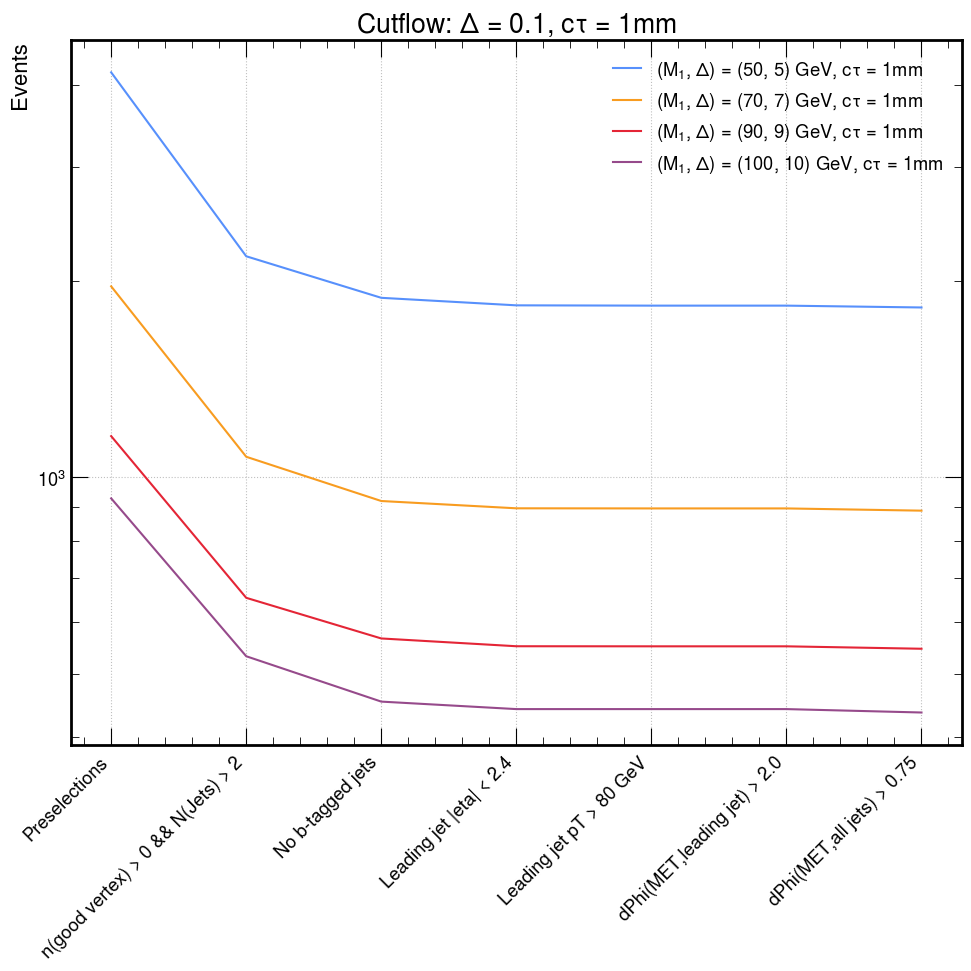

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


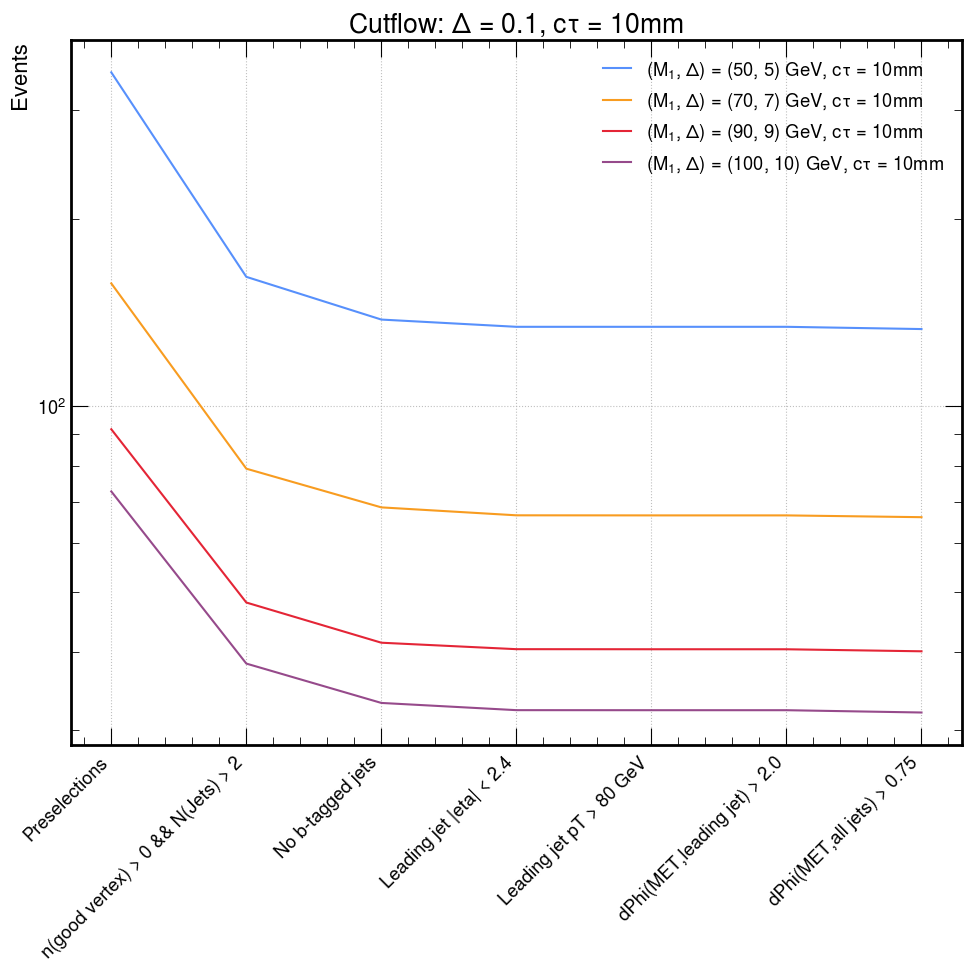

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


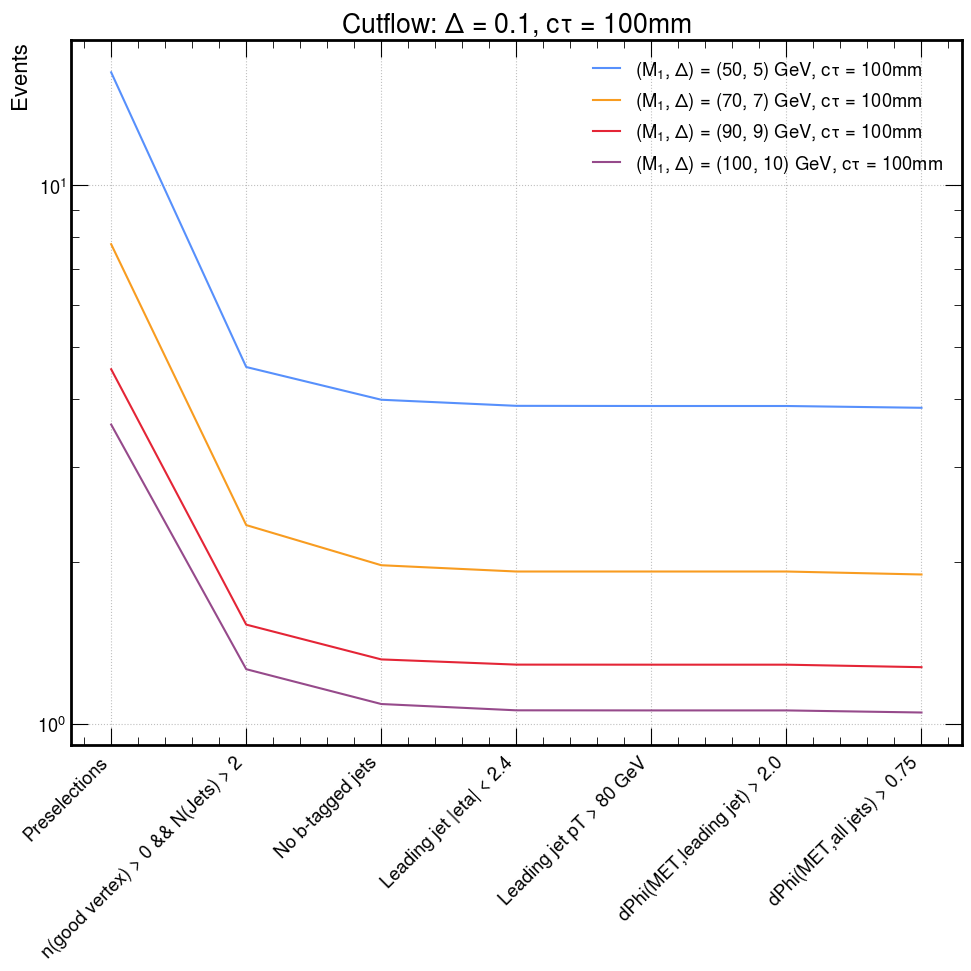

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


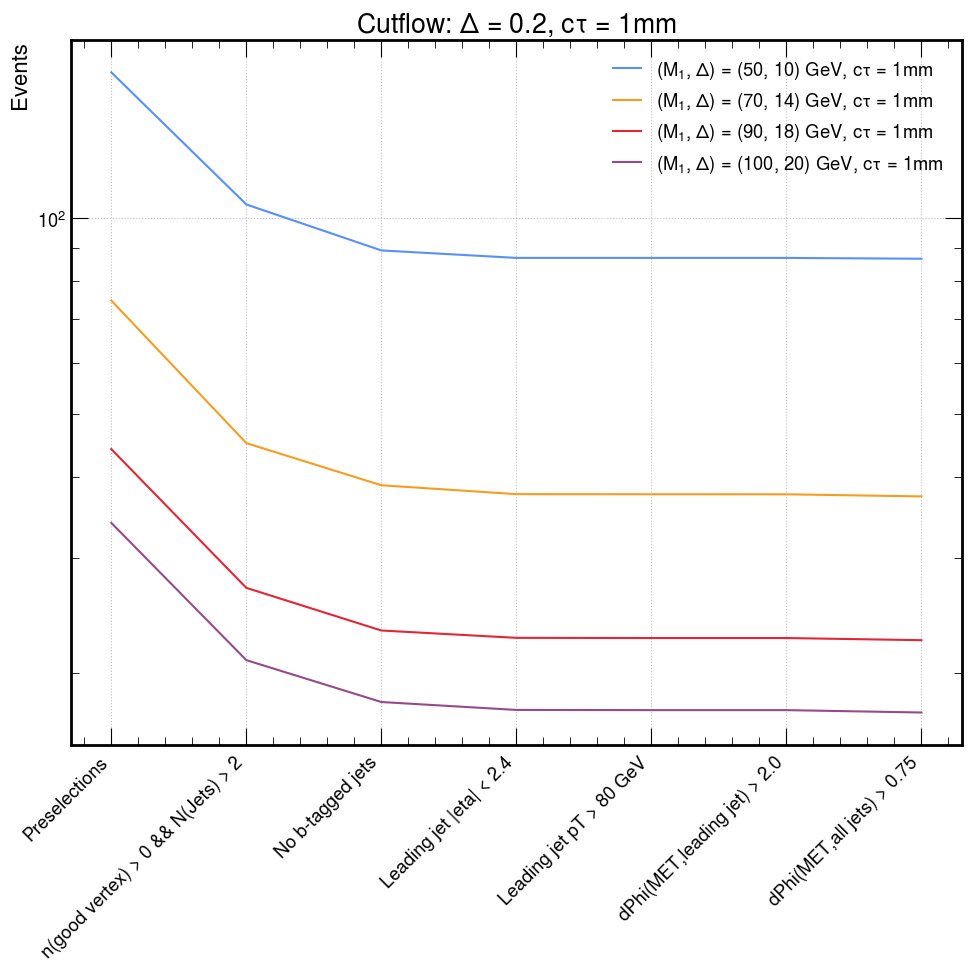

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


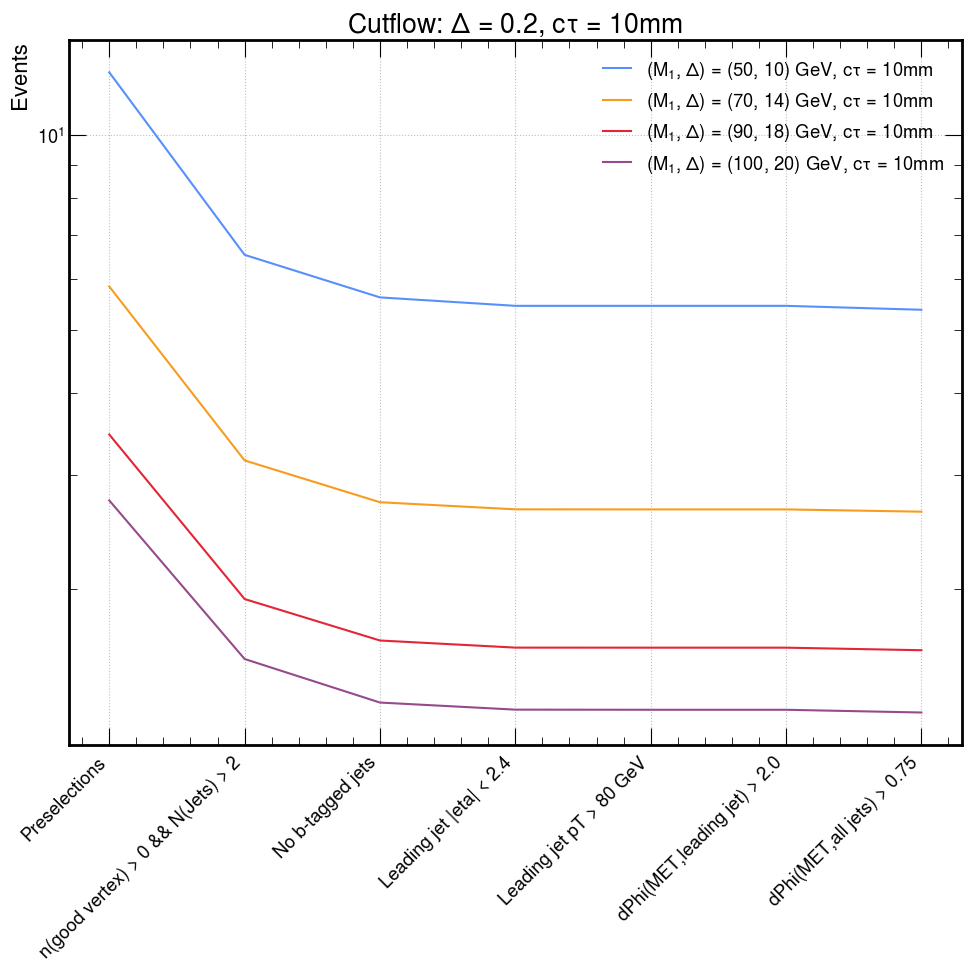

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


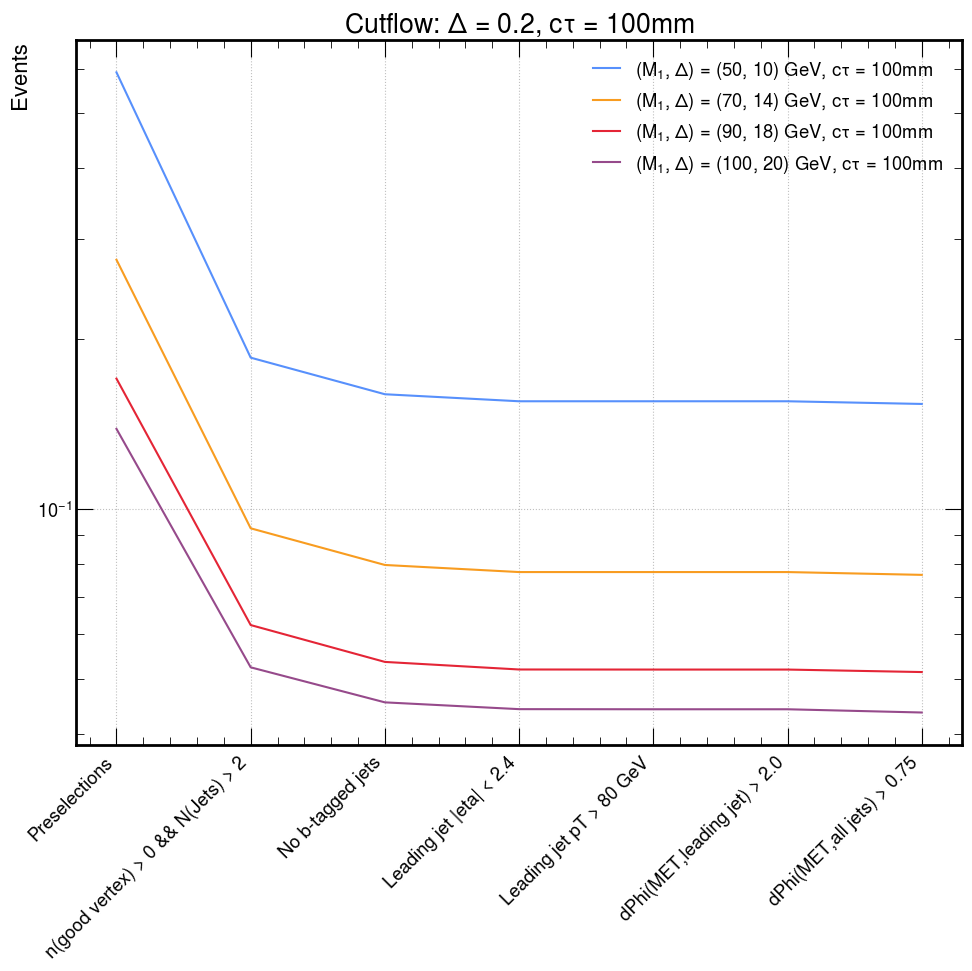

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [81]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75"
ZGamma,0.00032468,0.00001085,0.00000951,0.00000793,0.00000709,0.00000721,0.00000723
Top,0.00039885,0.00000872,0.00000533,0.00000490,0.00000445,0.00000439,0.00000414
DY,0.00018701,0.00000911,0.00000722,0.00000716,0.00000697,0.00000692,0.00000637
ZJets,0.00242159,0.00004092,0.00003357,0.00003328,0.00003188,0.00003179,0.00003005
WJets,0.00101318,0.00001998,0.00001606,0.00001581,0.00001518,0.00001511,0.00001417
Multiboson,0.00065832,0.00002550,0.00001943,0.00001639,0.00001533,0.00001472,0.00001434
QCD,0.00000249,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Total,0.00001696,0.00000030,0.00000023,0.00000023,0.00000022,0.00000022,0.00000020


In [82]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_preselections/Cutflow/Efficiency//Background_Efficiency.csv


In [83]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75"
ZGamma,"1,665.13",55.64,48.78,40.68,36.34,36.98,37.07
Top,"26,174.93",572.21,349.98,321.84,292.06,288.39,271.38
DY,"5,819.49",283.63,224.70,222.95,216.97,215.32,198.30
ZJets,"63,745.58","1,077.24",883.75,875.97,839.25,836.83,791.02
WJets,"214,692.24","4,234.00","3,402.86","3,349.47","3,217.36","3,202.03","3,002.86"
Multiboson,"4,588.16",177.76,135.42,114.23,106.85,102.62,99.94
QCD,"53,432.27",143.90,73.61,73.61,43.30,38.85,16.05
Total,"370,117.80","6,544.37","5,119.10","4,998.75","4,752.13","4,721.01","4,416.62"


In [84]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_preselections/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [85]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75"
ZGamma,6506,231,182,160,151,143,133
Top,703976,14988,8943,8084,7307,7135,6664
DY,296131,5911,3794,3779,3731,3580,2830
ZJets,738994,6747,5290,5242,5081,5019,4378
WJets,1177020,11371,8501,8371,8116,8002,7119
Multiboson,25187,989,749,612,576,533,512
QCD,31490,53,14,14,13,12,2
Total,2979304,40290,27473,26262,24975,24424,21638


In [86]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,No b-tagged jets,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75"
ZGamma,6506,231,182,160,151,143,133
Top,703976,14988,8943,8084,7307,7135,6664
DY,296131,5911,3794,3779,3731,3580,2830
ZJets,738994,6747,5290,5242,5081,5019,4378
WJets,1177020,11371,8501,8371,8116,8002,7119
Multiboson,25187,989,749,612,576,533,512
QCD,31490,53,14,14,13,12,2
Total,2979304,40290,27473,26262,24975,24424,21638


In [87]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_preselections/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [88]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 4416.62


In [89]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZGamma,Top,DY,ZJets,WJets,Multiboson,QCD,Total
Weighted Counts,37.07,271.38,198.30,791.02,"3,002.86",99.94,16.05,"4,416.62"
Raw Counts,133.00,"6,664.00","2,830.00","4,378.00","7,119.00",512.00,2.00,"21,638.00"
